In [63]:
import pandas as pd
import numpy as np
%matplotlib inline

In [64]:
df = pd.read_csv('loan.csv', delimiter=';')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [65]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Checking for Null values

In [66]:
df.isnull().sum()


Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [67]:
df.dtypes ## by using .dtypes we will get the data type of each column

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# DEALING WITH THE MISSING VALUES¶


#### Gender column

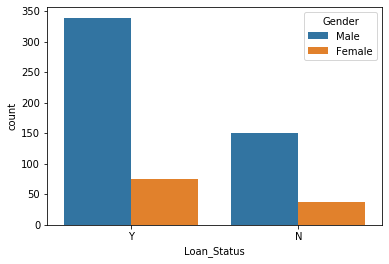

In [68]:
import seaborn as sns
sns.countplot('Loan_Status',hue='Gender',data=df)

### BY ANALYSING THE GRAPH WE SEE THAT THE MAJORITY OF GENDER IS MALE SO, WE ARE GOING TO FILL GENDER COLUMN'S NULL VALUES WITH 'MALE'

In [69]:
df['Gender'] = df['Gender'].fillna('Male')

## 'MARRIED'  COLUMN HAS 3 NULL VALUES

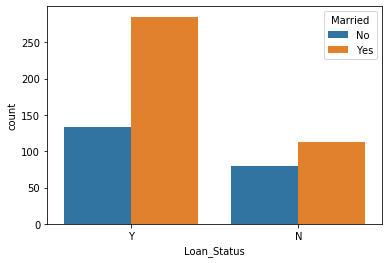

In [70]:
sns.countplot('Loan_Status',hue='Married',data=df)

### WE CAN UNDERSTAND THAT MARRIED PEOPLE WILL GET THE LOAN. SO AS THE MAJORITY SAYS WE WILL FILL THE 'MARRIED' COLUMN'S NULL VALUES WITH 'YES'



In [71]:
df['Married'] = df['Married'].fillna('Yes')


### 'DEPENDENTS' COLUMN HAS 15 NULL VALUES

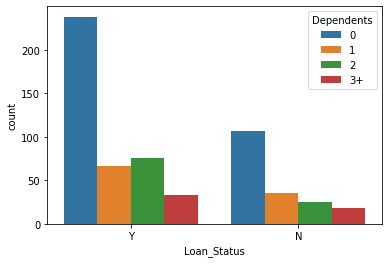

In [72]:
sns.countplot('Loan_Status',hue='Dependents',data=df)


## Since most of the dependents are 0 we are gonna fill with it with 0



In [73]:
df['Dependents'] = df['Dependents'].fillna('0')

## 'SELF-EMPLOYED' COLUMN HAS 32 NULL VALUES



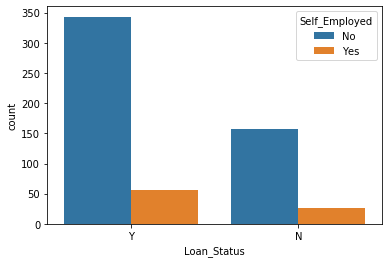

In [74]:
sns.countplot('Loan_Status' , hue = 'Self_Employed' , data = df)

## WE CAN SEE HERE THAT THE 'SELF_EMPLOYED' COLUMN' HAS THE MAJORITY 'NO'. SO WE ARE GOING TO FILL THAT COLUMN WITH 'NO'

In [75]:
df['Self_Employed']=df['Self_Employed'].fillna('No')

## NOW THE DEALING WITH THE 'LOANAMOUNT' COLUMN WHICH HAS 22 NULL VALUES.

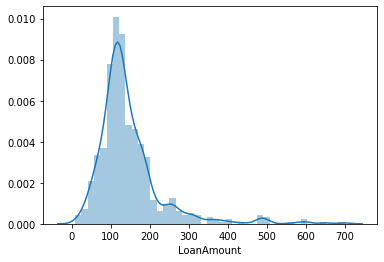

In [76]:
sns.distplot(df['LoanAmount'])


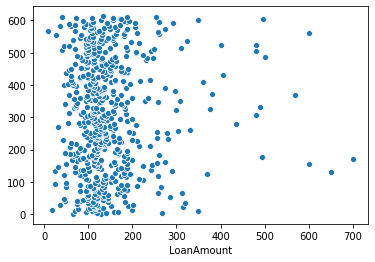

In [77]:
sns.scatterplot(df['LoanAmount'],y=np.arange(0,614))


## THE OUTLIERS IN THE DATA SEEMS TO BE RIGHT SKEWED , SO WE WILL NOT FILL THE VALUES BY THE MEAN OF THIS DATA, WE ARE GOING TO TAKE THE MEAN WHICH DOES NOT CONTAIN OUTLIERS.



In [78]:
mean=df[df['LoanAmount']<=400]['LoanAmount'].mean()
df['LoanAmount'].fillna(mean,inplace=True)

In [79]:
## 'LOAN_AMOUNT_TERM' COLUMN HAS 14 NULL VALUES


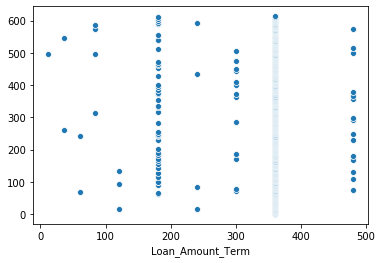

In [80]:
sns.scatterplot(df['Loan_Amount_Term'],y=np.arange(0,614))


## TO FILL THE MISSING VALUES WE WILL USE MODE

In [81]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)

## 'CREDIT_HISTORY' HAS 50 NULL VALUES



In [82]:
df['Credit_History'].unique()

array([ 1.,  0., nan])

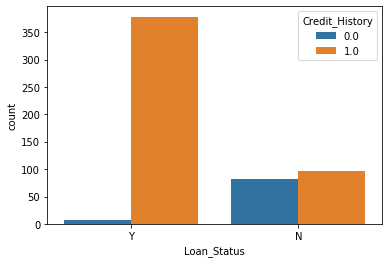

In [83]:
sns.countplot('Loan_Status',hue='Credit_History',data=df)

## TO FILL THE MISSING VALUES WE WILL USE MODE



In [84]:
df['Credit_History'].fillna(df['Credit_History'].value_counts().idxmax(), inplace=True)


## NOW WE WILL CHECK WHETHER THE DATA STILL HAS ANY NULL VALUES OR NOT



In [85]:
df.head(10)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,137.186851,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


## ONE-HOT ENCODING WILL BE DONE TO CHANGE THE CATEGORICAL DATA INTO NUMERICAL DATA BEFORE WE DEPLOY IT INTO OUR MODEL SO THAT THE PROCESS BECOMES EASY.


In [86]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df_data = df.copy()

### CHECKING WHETHER ALL OUR DUPLICATE VALUES HAVE BEEN REMOVED OR NOT, SUCH AS yes,YES,no,NO......



In [87]:
print(df_data['Gender'].unique())
print(df_data['Married'].unique())
print(df_data['Education'].unique())
print(df_data['Self_Employed'].unique())
print(df_data['Property_Area'].unique())

['Male' 'Female']
['No' 'Yes']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Rural' 'Semiurban']


## TRANSFORMING THE CATEGORICAL DATA INTO NUMERICAL DATA 0,1,2..



In [88]:
df_data['Gender'] = lb.fit_transform(df_data['Gender'])
df_data['Married'] = lb.fit_transform(df_data['Married'])
df_data['Education'] = lb.fit_transform(df_data['Education'])
df_data['Self_Employed'] = lb.fit_transform(df_data['Self_Employed'])
df_data['Property_Area'] = lb.fit_transform(df_data['Property_Area'])
df_data['Loan_Status'] = lb.fit_transform(df_data['Loan_Status'])
df_data['Dependents'] = lb.fit_transform(df_data['Dependents'])

In [89]:
### LET US CHECK IT

print(df_data['Gender'].unique())
print(df_data['Married'].unique())
print(df_data['Education'].unique())
print(df_data['Self_Employed'].unique())
print(df_data['Property_Area'].unique())
print(df_data['Loan_Status'].unique())
print(df_data['Dependents'].unique())

[1 0]
[0 1]
[0 1]
[0 1]
[2 0 1]
[1 0]
[0 1 2 3]


### YOU CAN SEE THAT THE DATA HAS BEEN TRANSFROMED COMPLETELY INTO THE NUMERICAL DATA

# DEPLOYING THE DATA INTO OUR MODEL


In [2]:
df_data.columns


NameError: name 'df_data' is not defined

# STEP_1:- INITIALISATION OF X and Y


In [1]:
X = df_data.drop(['Loan_ID','Loan_Status'],axis=1)
Y = df_data[['Loan_Status']]

NameError: name 'df_data' is not defined

# STEP_2:- SPLITING TRAINING AND TESTING SETS¶


In [92]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.3,random_state=43)

# STEP_3 :- UNDERGOING STANDARDISATION PROCESS


In [93]:
### Because the data is big enough

In [94]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(xtrain)
xtr = std.transform(xtrain)

# STEP_4:- TRAINING OUR MODEL ON TRAINING DATA¶

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lgt = LogisticRegression()

In [96]:
lgt.fit(xtr,ytrain)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# STEP_5:- PREDICTING ON TEST VALUES


## TRANSFORMING THE TESTING FEATURES INTO STANDARD FORMS



In [97]:
xts = std.transform(xtest)

### NOW PREDICTING ON TRANSFORMED TESTING FEATURES.



In [98]:
predict = lgt.predict(xts)

In [99]:
print(predict)

[1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1]


### GETTING THE ACCURACY REPORT



In [100]:
print(classification_report(ytest,predict))


              precision    recall  f1-score   support

           0       0.94      0.47      0.62        62
           1       0.79      0.98      0.87       123

    accuracy                           0.81       185
   macro avg       0.86      0.73      0.75       185
weighted avg       0.84      0.81      0.79       185



# HENCE,THE ACCURACY LEVEL IS OF ABOUT 86%